## Part 4: Modeling with experimental data

### 4.1 Load experimental data

In [12]:
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# sfw_matrix = pd.read_pickle('results/sfw_matrix.pickle')
trophic_levels = pd.read_pickle('results/trophic_levels.pickle')
G = nx.read_gpickle('results/G.pickle')

In [14]:
# To-do: button to import experimental data

In [15]:
# ***Developer code***
df_field = pd.read_csv("data/RecastingFieldExperiment.txt", sep="\t")
#df_field

In [37]:
df_field

,Record_ID,Plot_ID,Replicate,Web_ID,MajorGroup,PhylogeneticGroup,OTU,Guild,Trophic_ID,Taxon_ID,TrophicLevel,Log10(Abundance),Log10(Mass),Log10(Biomass),TotalSoil-C,TotalSoil-N,TotalSoil-P,Soil-pH
0,1,A,1,A1,Mesofauna,Acarina,Achipteria coleoptrata,Macrophytophage and panphytophage mite,12,12001,2,2.88,1.31,4.19,1916.67,173.57,18.86,5.0
1,2,A,1,A1,Mesofauna,Acarina,Eupodidae,Omnivore mite,82,82047,3,3.06,0.44,3.50,1916.67,173.57,18.86,5.0
2,3,A,2,A2,Mesofauna,Acarina,Achipteria coleoptrata,Macrophytophage and panphytophage mite,12,12001,2,2.88,1.14,4.02,2416.67,167.86,17.60,5.0
3,4,A,2,A2,Mesofauna,Acarina,Bdellidae,Predatory mite (attacking arthropods),62,62015,3,2.58,0.92,3.50,2416.67,167.86,17.60,5.0
4,5,A,2,A2,Mesofauna,Acarina,Eupodidae,Omnivore mite,82,82047,3,2.88,0.36,3.24,2416.67,167.86,17.60,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,584,B,2,B2,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,8.89,8.89,2166.67,165.00,16.75,5.2
584,585,B,3,B3,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,9.12,9.12,2333.33,145.71,16.89,5.3
585,586,C,1,C1,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,9.05,9.05,3083.33,234.29,32.52,5.1
586,587,C,2,C2,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,8.98,8.98,3333.33,193.57,32.10,4.9


### 4.2 Preprocessing experimental data

To-Do: Explain that these sections are specific to the case data

In [16]:
# Create df for Plot A # What if user has no plots?
df_field_a = df_field[df_field["Plot_ID"] == "A"].copy()
# Sort by OTU
df_field_a.sort_values("OTU", inplace=True)

# Add new column with removed log  
df_field_a["Biomass"] = 10**(df_field_a["Log10(Biomass)"])
df_field_a["Mass"] = 10**(df_field_a["Log10(Mass)"])
df_field_a["Abundance"] = 10**(df_field_a["Log10(Abundance)"])

# Quantify organisms
OTUs = df_field_a.OTU.unique()
print(f"Number of OTUs in plot A: {len(OTUs)}") #How should we name OTUs (organisms)? Or rather 
trophic_groups = df_field_a.Trophic_ID.unique()
print(f"Number of trophic groups in plot A: {len(trophic_groups)}")

# Create dictionary for number of times an organism appears (nr. of replicates)
organism_count = df_field_a.OTU.value_counts()
trophic_group_count = df_field_a.Trophic_ID.value_counts()

#df_field_a

Number of OTUs in plot A: 96
Number of trophic groups in plot A: 23


In [17]:
# To-do: piechart

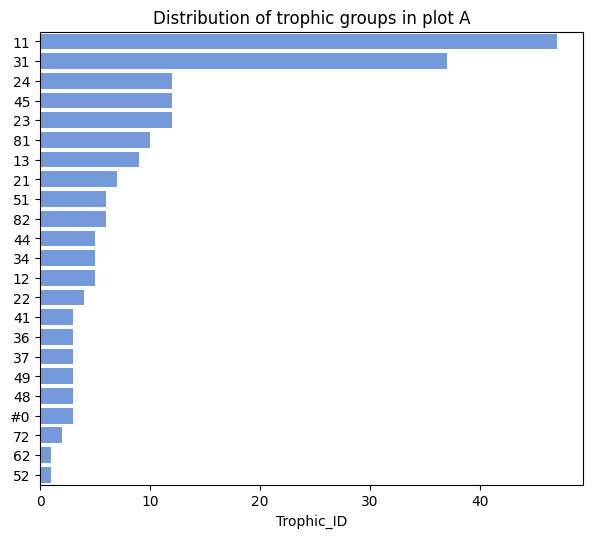

In [18]:
# Should we plot distribution of trophic groups?
fig, plot = plt.subplots(figsize = (7,6), dpi = 100)
plot = sns.barplot(y=list(trophic_group_count.index), x=trophic_group_count, color='cornflowerblue')
plot.set_title('Distribution of trophic groups in plot A', fontsize = 12);

### 4.3 Calculate the aggregated biomas, mass and abundance per trophic group [can be part of 5.2?]

In [19]:
# To-do: needs to be done in one cell

In [20]:
# Calculate the aggregated biomas per Trophic_ID
# Create dictionary mapping OTUs to Trophic_IDs
OTU2trophicID = pd.Series(df_field_a.Trophic_ID.values, df_field_a.OTU.values).to_dict()

# Calcualte avg biomas by OTU groups
df_group_A_bm = df_field_a.groupby(["OTU"], as_index=False).Biomass.mean()
df_group_A_bm.Biomass = df_group_A_bm.Biomass.round(2)

# Add Trophic_ID to df_group_a
for idx, otu in df_group_A_bm["OTU"].iteritems():
    df_group_A_bm.loc[idx, "Trophic_ID"] = OTU2trophicID[otu]

# Calcualte sum of biomas by trophic groups
df_group_A_bm = df_group_A_bm.groupby("Trophic_ID", as_index=False).Biomass.sum()

# Create dictionary for avg biomass feature
avg_biomass_A = pd.Series(df_group_A_bm.Biomass.values, df_group_A_bm.Trophic_ID.values).to_dict()

# Unify node names and Trophic_ID names in Biomass dict
for key_attr in list(avg_biomass_A):
    for key_node in list(G.nodes):
        if key_attr in key_node:
            avg_biomass_A[key_node] = avg_biomass_A.pop(key_attr)

# Round values
avg_biomass_A = {key : round(avg_biomass_A[key], 2) for key in avg_biomass_A}

# If no "92 Predatory mite (parasitizing mites and nematodes)" add them manually #Need to generalise?
avg_biomass_A["92 Predatory mite (parasitizing mites and nematodes)"] = 0
# dict(sorted(avg_biomass_A.items(), key=lambda item: item[1]))

In [21]:
# Should there be a comment: "'92 Predatory mite (parasitizing mites and nematodes)' was not detected in Plot A and C and has no biomass feature."

In [22]:
# Calculate the aggregated mass per Trophic_ID

# Calcualte avg mass by OTU group
df_group_A_m = df_field_a.groupby(["OTU"], as_index=False).Mass.mean()
# df_group_A_m.Mass = df_group_A_m.Mass.round(4)

# Add Trophic_ID to df_group_a
for idx, otu in df_group_A_m["OTU"].iteritems():
    df_group_A_m.loc[idx, "Trophic_ID"] = OTU2trophicID[otu]

df_group_A_m = df_group_A_m.groupby("Trophic_ID", as_index=False).Mass.sum()
df_group_A_m

# pd.set_option("max_rows", None)

# Create dictionary for avg mass feature
avg_mass_A = pd.Series(df_group_A_m.Mass.values, df_group_A_m.Trophic_ID.values).to_dict()

#Change key "#0" to 00
#avg_mass_A["00"] = avg_mass_A.pop("#0")

# Unify node names and Trophic_ID names in Mass dict
for key_attr in list(avg_mass_A):
    for key_node in list(G.nodes):
        if key_attr in key_node:
            avg_mass_A[key_node] = avg_mass_A.pop(key_attr)

# Round values, many values become 0?
# avg_mass_A = {key : round(avg_mass_A[key], 2) for key in avg_mass_A}
            
# If no "92 Predatory mite (parasitizing mites and nematodes)" add them manually
avg_mass_A["92 Predatory mite (parasitizing mites and nematodes)"] = 0
# dict(sorted(avg_mass_A.items(), key=lambda item: item[1]))

In [23]:
# Calculate the aggregated abundance per Trophic_ID

# Calcualte avg abundance by OTU group
df_group_A_ab = df_field_a.groupby(["OTU"], as_index=False).Abundance.mean()
# df_group_A_m.Abundance = df_group_A_m.Abundance.round(4)

# Add Trophic_ID to df_group_a
for idx, otu in df_group_A_ab["OTU"].iteritems():
    df_group_A_ab.loc[idx, "Trophic_ID"] = OTU2trophicID[otu]

df_group_A_ab = df_group_A_ab.groupby("Trophic_ID", as_index=False).Abundance.sum()
df_group_A_ab

# pd.set_option("max_rows", None)

# Create dictionary for avg mass feature
avg_abund_A = pd.Series(df_group_A_ab.Abundance.values, df_group_A_ab.Trophic_ID.values).to_dict()

#Change key "#0" to 00
#avg_mass_A["00"] = avg_mass_A.pop("#0")

# Unify node names and Trophic_ID names in Abundance dict
for key_attr in list(avg_abund_A):
    for key_node in list(G.nodes):
        if key_attr in key_node:
            avg_abund_A[key_node] = avg_abund_A.pop(key_attr)

# Round values
avg_abund_A = {key : round(avg_abund_A[key], 2) for key in avg_abund_A}            

# If no "92 Predatory mite (parasitizing mites and nematodes)" add them manually [CHECK for other plots!]
avg_abund_A["92 Predatory mite (parasitizing mites and nematodes)"] = 0
# dict(sorted(avg_abund_A.items(), key=lambda item: item[1]))

### 4.4 Adding trophic level, biomass, mass and abundance as attributes to the network

In [24]:
trophic_levels_dict = trophic_levels.to_dict()

# Add trophic level as attribute
nx.set_node_attributes(G, trophic_levels_dict, "trophic_level")
# Add biomas as attribute
nx.set_node_attributes(G, avg_biomass_A, "Biomass")
# Add mass as attribute
nx.set_node_attributes(G, avg_mass_A, "Mass")
# Add abundance as attribute
nx.set_node_attributes(G, avg_abund_A, "Abundance")
# G.nodes(data=True)

In [25]:
# To-Do: create a button to download final network with experimental data

In [26]:
# To-Do: visualisation of final network? Nodes reflecting size of attributes

In [27]:
# ***Dev code***
## Create a pickle of the graph
#nx.write_gpickle(G, "objects/graph-A_4_0", protocol=5)

### 4.5 Calculating total biomas (and abundance?) per trophic level 

In [28]:
# to-do: visualise with log and linear

In [29]:
# Calculate biomass per trophic level
biomass_tl0, biomass_tl1, biomass_tl2, biomass_tl3 = 0.0, 0.0, 0.0, 0.0

for n in G.nodes():
    if G.nodes[n]["trophic_level"] == 0:
        biomass_tl0 += G.nodes[n]["Biomass"]
    elif G.nodes[n]["trophic_level"] == 1:
        biomass_tl1 += G.nodes[n]["Biomass"]
    elif G.nodes[n]["trophic_level"] == 2:
        biomass_tl2 += G.nodes[n]["Biomass"]
    elif G.nodes[n]["trophic_level"] == 3:
        biomass_tl3 += G.nodes[n]["Biomass"]
  
print("--- Total biomas per trophic level ---")           
print(f"Trophic level0 biomass: {round(biomass_tl0, 2)}\nTrophic level1 biomass: {round(biomass_tl1, 2)}\nTrophic level2 biomass: {round(biomass_tl2, 2)}, \nTrophic level3 biomass: {round(biomass_tl3, 2)}")
print(f"Trophic level2&3: {round(biomass_tl2 + biomass_tl3, 2)}")

--- Total biomas per trophic level ---
Trophic level0 biomass: 862053479.33
Trophic level1 biomass: 23187728.31
Trophic level2 biomass: 319919.35, 
Trophic level3 biomass: 79060.65
Trophic level2&3: 398980.0


### 4.6 Preparing abundance rankings per trophic level 

In [30]:
# To-do: compress in one cell

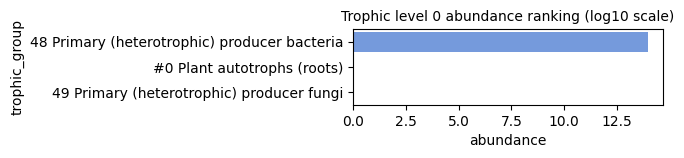

In [31]:
import math
from operator import itemgetter

# trophic level 0
log_tl0_abund = {x: round(math.log10(y["Abundance"]), 2) for x,y in G.nodes(data=True) if y["trophic_level"]==0}
log_tl0_abund = sorted(log_tl0_abund.items(), key=itemgetter(1), reverse=True)

# plot trophic level 0 abundance
log_tl0_abund_df = pd.DataFrame(log_tl0_abund, columns= ["trophic_group", "abundance"])
fig, plot = plt.subplots(figsize = (4,1), dpi = 100)
sns.barplot(y="trophic_group", x="abundance", data=log_tl0_abund_df, color='cornflowerblue')
plot.set_title('Trophic level 0 abundance ranking (log10 scale)', fontsize = 10);

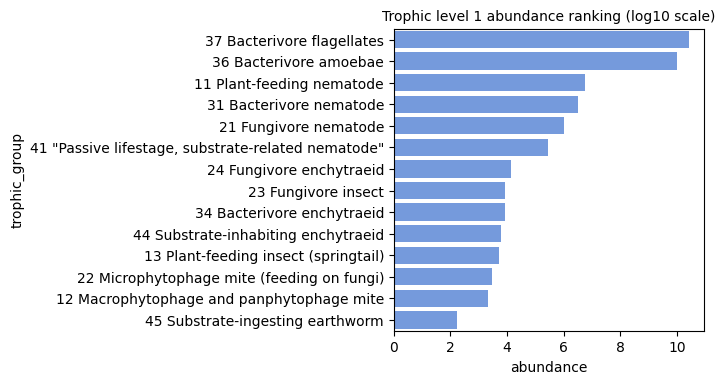

In [33]:
# Rank trophic groups by abundance per trophic level
# trophic level 1
log_tl1_abund = {x: round(math.log10(y["Abundance"]), 2) for x,y in G.nodes(data=True) if y["trophic_level"]==1}
log_tl1_abund = sorted(log_tl1_abund.items(), key=itemgetter(1), reverse=True) 

# plot trophic level 1 abundance
log_tl1_abund_df = pd.DataFrame(log_tl1_abund, columns= ["trophic_group", "abundance"])
fig, plot = plt.subplots(figsize = (4,4), dpi = 100)
sns.barplot(y="trophic_group", x="abundance", data=log_tl1_abund_df, color='cornflowerblue')
plot.set_title('Trophic level 1 abundance ranking (log10 scale)', fontsize = 10);

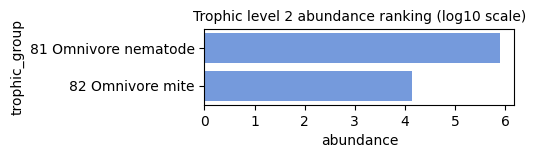

In [34]:
# trophic level 2
log_tl2_abund = {x: round(math.log10(y["Abundance"]), 2) for x,y in G.nodes(data=True) if y["trophic_level"]==2}
log_tl2_abund = sorted(log_tl2_abund.items(), key=itemgetter(1), reverse=True) 

# plot trophic level 2 abundance
log_tl2_abund_df = pd.DataFrame(log_tl2_abund, columns= ["trophic_group", "abundance"])
fig, plot = plt.subplots(figsize = (4,1), dpi = 100)
sns.barplot(y="trophic_group", x="abundance", data=log_tl2_abund_df, color='cornflowerblue')
plot.set_title('Trophic level 2 abundance ranking (log10 scale)', fontsize = 10);

Ranking of abundances at trophic level 3:


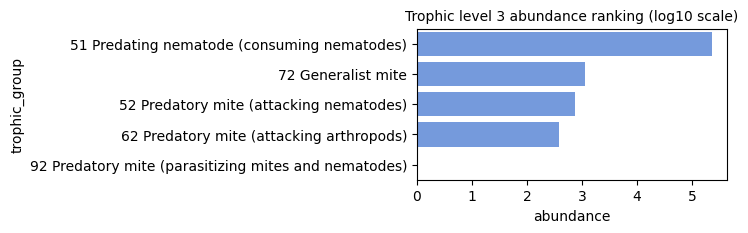

In [35]:
# trophic level 3
tl3_abund = {x: (y["Abundance"]) for x,y in G.nodes(data=True) if y["trophic_level"]==3 }
print(f"Ranking of abundances at trophic level 3:")
tl3_abund = sorted(tl3_abund.items(), key=itemgetter(1), reverse=True) 

# custom log function accepting 0 as value
def cust_log(tuple_list, base):
    l = []
    for x, y in tuple_list:
        if y != 0:
            l.append((x, math.log(y, base)))
        else:
            l.append((x, 0.0))  
    return l

log_tl3_abund = cust_log(tl3_abund, 10)

# plot trophic level 3 abundance
log_tl3_abund_df = pd.DataFrame(log_tl3_abund, columns= ["trophic_group", "abundance"])
fig, plot = plt.subplots(figsize = (4,2), dpi = 100)
sns.barplot(y="trophic_group", x="abundance", data=log_tl3_abund_df, color='cornflowerblue')
plot.set_title('Trophic level 3 abundance ranking (log10 scale)', fontsize = 10);

Ranking of abundances at trophic level 2 and 3:


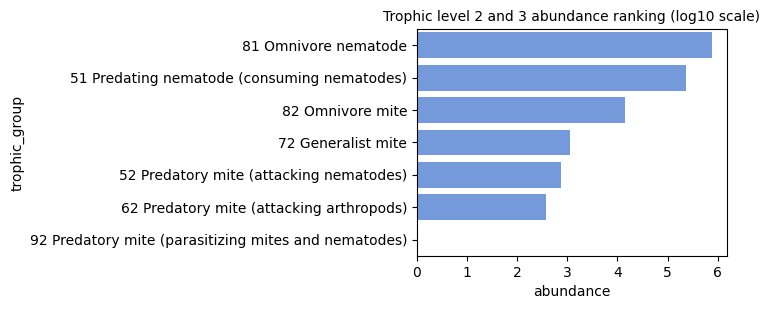

In [36]:
# trophic level 2 and 3
tl2and3_abund = {x: (y["Abundance"]) for x,y in G.nodes(data=True) if y["trophic_level"]== 2 or y["trophic_level"]==3}
print(f"Ranking of abundances at trophic level 2 and 3:")
tl2and3_abund = sorted(tl2and3_abund.items(), key=itemgetter(1), reverse=True)
log_tl2and3_abund = cust_log(tl2and3_abund, 10)

# plot trophic level 2 and 3 abundance
log_tl2and3_abund_df = pd.DataFrame(log_tl2and3_abund, columns= ["trophic_group", "abundance"])
fig, plot = plt.subplots(figsize = (4,3), dpi = 100)
sns.barplot(y="trophic_group", x="abundance", data=log_tl2and3_abund_df, color='cornflowerblue')
plot.set_title('Trophic level 2 and 3 abundance ranking (log10 scale)', fontsize = 10);

### Similarity of ordered lists of average biomass values using Rank-biased overlap

The rank-biased overlap (RBO) is a method for comparing ranked lists. It takes a parameter that specifies the user’s persistence, that is, the probability that the user, having examined the overlap at one rank, continues on to consider the overlap at the next. The product of these probabilities gives the probability that the user will reach a certain rank, defining the weight of the overlap to that rank. The weights are geometrically decreasing, but never reach zero, reflecting the indefinite nature of the ranking. The parameter determines how steep the decline in weights is: the smaller p, the more top-weighted the metric is. In the limit, when p = 0, only the top-ranked item is considered, and the RBO score is either zero or one. On the other hand, as p approaches arbitrarily close to 1, the weights become arbitrarily flat, and the evaluation becomes arbitrarily deep.

For example, setting p to 0.9 is equivalent to giving the first ten results 86% of the weight in the similarity comparison.

In [1]:
import pandas as pd

plot_biomass_ranked = pd.read_excel('data/plots_A-B-C-biomass-ranked.xlsx')
A, B, C = plot_biomass_ranked['A'].to_list(), plot_biomass_ranked['B'].to_list(), plot_biomass_ranked['C'].to_list()

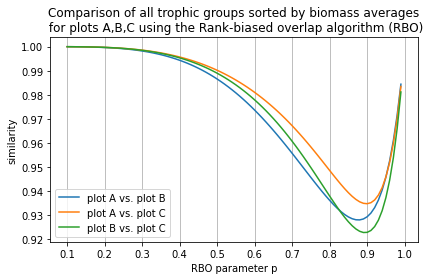

In [5]:
from itertools import combinations
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from utils import rbo_calc as rbo

data = {}
prange = np.arange(0.1,1,0.01)
for p in prange:
    for e1,e2 in combinations(['A', 'B', 'C'], 2):
        # key = 'p-'.join([e1,e2])
        key = f'plot {e1} vs. plot {e2}'
        if key not in data:
            data[key] = []
        S = plot_biomass_ranked[e1].to_list()
        T = plot_biomass_ranked[e2].to_list()
        rsim  = rbo.calc_rbo(S, T, p)
        data[key].append(rsim)
        # print(f'{e1}-{e2}-{rbo.calc_rbo(S, T, 0.999)}') 
    # pprint.pprint(sorted(results, reverse=True))
results = pd.DataFrame({'p': prange, **data})

fig, plot = plt.subplots(figsize=(6, 4))
ax = sns.lineplot(x='p', y='value', hue='variable', data=pd.melt(results, ['p']))
ax.set(xlabel='RBO parameter p', ylabel='similarity')
ax.set_xticks(np.arange(0.1,1.1,0.1))
ax.grid(which='major', axis='x')
ax.set_title('Comparison of all trophic groups sorted by biomass averages\n for plots A,B,C using the Rank-biased overlap algorithm (RBO)')
ax.legend_.set_title('')
plt.tight_layout()
plt.savefig('results/figures/plots-A-B-C_similarity.png')